In [1]:
import numpy as np
import open3d as o3d
import matplotlib.pyplot as plt

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [2]:
!pwd

/home/mario/Documents/Proyecto_AYUDAME_Testing/Incidences


### Piso de la primer nube de puntos

In [3]:
# Lee la nube de puntos
pcd = o3d.io.read_point_cloud('../1661364978.620502.ply')

In [4]:
# Visualiza la nube de puntos leida
o3d.visualization.draw_geometries([pcd])

In [5]:
# Segmenta a los puntos dentro de un plano
plane_model, inliers = pcd.segment_plane(distance_threshold=0.01,
                                         ransac_n=3,
                                         num_iterations=1000)
[a, b, c, d] = plane_model
print(f"Plane equation: {a:.2f}x + {b:.2f}y + {c:.2f}z + {d:.2f} = 0")

Plane equation: -0.08x + 0.99y + -0.06z + -0.90 = 0


In [6]:
# Selecciona y colorea a los puntos que pertenecen al plano
inlier_cloud = pcd.select_by_index(inliers)
inlier_cloud.paint_uniform_color([1.0, 0, 0])
outlier_cloud = pcd.select_by_index(inliers, invert=True)

# Visualiza los puntos dentro del plano
o3d.visualization.draw_geometries([inlier_cloud, outlier_cloud])

### Piso de la segunda nube de puntos

In [6]:
# Lee la nube de puntos
pcd1 = o3d.io.read_point_cloud('pcd_test1.ply')

In [7]:
# Visualiza la nube de puntos leida
o3d.visualization.draw_geometries([pcd1])

In [8]:
# Segmenta a los puntos dentro de un plano
plane_model, inliers = pcd1.segment_plane(distance_threshold=0.01,
                                         ransac_n=3,
                                         num_iterations=1000)
[a, b, c, d] = plane_model
print(f"Plane equation: {a:.2f}x + {b:.2f}y + {c:.2f}z + {d:.2f} = 0")

Plane equation: 0.00x + 0.99y + 0.11z + 0.60 = 0


In [9]:
# Selecciona y colorea a los puntos que pertenecen al plano
inlier_cloud = pcd1.select_by_index(inliers)
inlier_cloud.paint_uniform_color([1.0, 0, 0])
outlier_cloud = pcd1.select_by_index(inliers, invert=True)

# Visualiza los puntos dentro del plano
o3d.visualization.draw_geometries([inlier_cloud, outlier_cloud])

### Corte del plano inferior

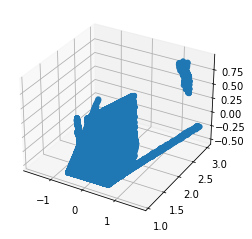

In [17]:
pcd = o3d.io.read_point_cloud('pcd_test3.ply')
points = np.asarray(pcd.points)
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(points[:,0],-points[:,2],points[:,1])

In [19]:
o3d.visualization.draw_geometries([pcd])

In [20]:
points_no_plane = points[-0.11*points[:,2]-0.57 < points[:,1]]

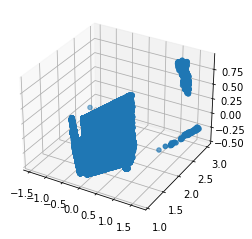

In [22]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(points_no_plane[:,0],-points_no_plane[:,2],points_no_plane[:,1])

In [23]:
pcd_no_plane = o3d.geometry.PointCloud()
pcd_no_plane.points = o3d.utility.Vector3dVector(points_no_plane)
o3d.visualization.draw_geometries([pcd_no_plane])

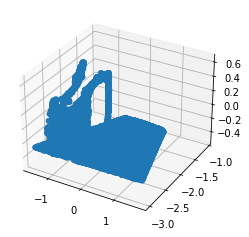

In [43]:
points = np.asarray(pcd1.points)
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(points[:,0],points[:,2],points[:,1])

In [45]:
%%time
points_no_plane = points[-0.11*points[:,2]-0.55 < points[:,1]]

CPU times: user 5.61 ms, sys: 0 ns, total: 5.61 ms
Wall time: 4.02 ms


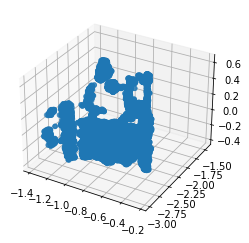

In [46]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(points_no_plane[:,0],points_no_plane[:,2],points_no_plane[:,1])
plt.show()